In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [10]:
def Normalize(url):
    data = pd.read_csv(url)
    
    norm_feature = ['tem_loc1', 'hum_loc1', 'coil_loc1', 
                    'tem_loc2', 'hum_loc2', 'coil_loc2', 
                    'tem_loc3', 'hum_loc3', 'coil_loc3', 
                    'tem_out',  'hum_out']
    
    scaler = MinMaxScaler()
    scaler.fit(data[norm_feature])
    #print(scaler.data_max_)
    scaler_result = scaler.transform(data[norm_feature])
    #data.loc[:,:] = scaler_result
    scaler_result = pd.DataFrame(scaler_result)
    return scaler_result

In [3]:
def normalize(df, norm_feature=None):
    if not norm_feature:
        norm_feature = ['tem_loc1', 'hum_loc1', 'coil_loc1', 
                        'tem_loc2', 'hum_loc2', 'coil_loc2', 
                        'tem_loc3', 'hum_loc3', 'coil_loc3', 
                        'tem_out',  'hum_out']
    result = df.copy()
    
    for feature_name in df.columns:
        if feature_name not in norm_feature: continue
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [24]:

url = './plant1_linear_test.csv'
data = pd.read_csv(url)
data.columns

Index(['Unnamed: 0', 'date', 'tem_loc1', 'hum_loc1', 'coil_loc1', 'tem_loc2',
       'hum_loc2', 'coil_loc2', 'tem_loc3', 'hum_loc3', 'coil_loc3', 'tem_out',
       'hum_out', 'cond_loc1', 'cond_loc2', 'cond_loc3', 'X24H_TMA',
       'X24H_cond_loc1', 'X24H_cond_loc2', 'X24H_cond_loc3', 'X48H_TMA',
       'X48H_cond_loc1', 'X48H_cond_loc2', 'X48H_cond_loc3'],
      dtype='object')

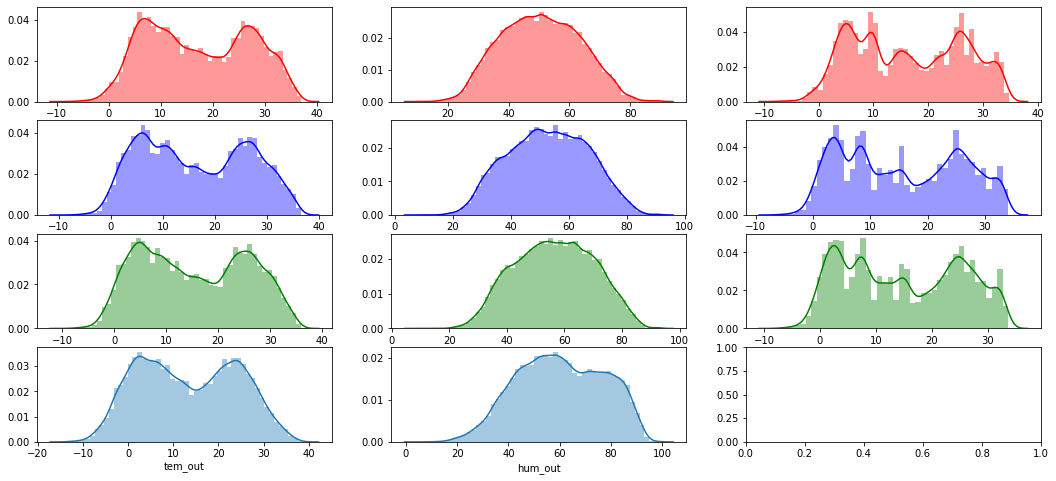

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
url = './plant1_linear_test.csv'
data = pd.read_csv(url)

figure, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9), (ax10,ax11,ax12)) = plt.subplots(nrows=4, ncols=3)
figure.set_size_inches(18,8)

sns.distplot(data['tem_loc1'], color = "red", ax=ax1)
sns.distplot(data['hum_loc1'], color = "red", ax=ax2)
sns.distplot(data['coil_loc1'], color = "red", ax=ax3)
sns.distplot(data['tem_loc2'], color = "blue", ax=ax4)
sns.distplot(data['hum_loc2'], color = "blue", ax=ax5)
sns.distplot(data['coil_loc2'], color = "blue", ax=ax6)
sns.distplot(data['tem_loc3'], color = "green", ax=ax7)
sns.distplot(data['hum_loc3'], color = "green", ax=ax8)
sns.distplot(data['coil_loc3'], color = "green", ax=ax9)
sns.distplot(data['tem_out'], ax=ax10)
sns.distplot(data['hum_out'], ax=ax11)

#이상치가 있다면 표준정규분포를 따르도록 하는 방법이 있음
# ex) Robust Scaler  /  Standard Scaler 
# 하지만 우리 데이터는 min-Max로 가능할 것 같음.

In [4]:
url = './plant1_linear_test.csv'
data = pd.read_csv(url)
result = normalize(data)
print(result.describe())
print(result.head())

         Unnamed: 0      tem_loc1      hum_loc1     coil_loc1      tem_loc2  \
count  58749.000000  58749.000000  58749.000000  58749.000000  58749.000000   
mean   29374.000000      0.562052      0.507690      0.562137      0.547697   
std    16959.519819      0.218700      0.160077      0.233700      0.226522   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%    14687.000000      0.367954      0.385714      0.347775      0.343896   
50%    29374.000000      0.544607      0.505514      0.545562      0.529792   
75%    44061.000000      0.760098      0.627444      0.779138      0.752734   
max    58748.000000      1.000000      1.000000      1.000000      1.000000   

           hum_loc2     coil_loc2      tem_loc3      hum_loc3     coil_loc3  \
count  58749.000000  58749.000000  58749.000000  58749.000000  58749.000000   
mean       0.538965      0.536673      0.542542      0.564826      0.541111   
std        0.163761      0.253640      0.226260    

In [11]:
url = './plant1_linear_test.csv'
result = Normalize(url)
print(r)
print(result.head())

          0         1         2         3         4         5         6  \
0  0.532179  0.175439  0.438192  0.497210  0.179813  0.424938  0.488963   
1  0.487794  0.225564  0.414646  0.452578  0.287701  0.375062  0.444370   
2  0.465601  0.288221  0.414646  0.430261  0.347638  0.375062  0.422074   
3  0.465601  0.288221  0.414646  0.430261  0.323663  0.375062  0.422074   
4  0.532179  0.225564  0.414646  0.519527  0.227763  0.424938  0.511260   

          7         8         9        10  
0  0.273289  0.424265  0.434175  0.394919  
1  0.392110  0.351325  0.395905  0.576369  
2  0.415875  0.351325  0.376770  0.544348  
3  0.380228  0.375638  0.606391  0.266837  
4  0.249525  0.399951  0.606391  0.160102  
